# Predicting Airbnb Prices 

### Preprocessing and Cleaning the Data 

In [2791]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation

In [2792]:
cols = [
    "host_id",
    "host_total_listings_count",
    "neighbourhood_cleansed",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "price",
    "minimum_nights",
    "availability_30",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365"
]

data = pd.read_csv("listings.csv", usecols=cols)

In [2793]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66641 entries, 0 to 66640
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    66641 non-null  int64  
 1   host_total_listings_count  66582 non-null  float64
 2   neighbourhood_cleansed     66641 non-null  object 
 3   latitude                   66641 non-null  float64
 4   longitude                  66641 non-null  float64
 5   property_type              66641 non-null  object 
 6   room_type                  66641 non-null  object 
 7   price                      66641 non-null  object 
 8   minimum_nights             66641 non-null  int64  
 9   availability_30            66641 non-null  int64  
 10  availability_365           66641 non-null  int64  
 11  number_of_reviews          66641 non-null  int64  
 12  reviews_per_month          48082 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usag

In [2794]:
data.head()

,host_id,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,minimum_nights,availability_30,availability_365,number_of_reviews,reviews_per_month
0,54730,3.0,Islington,51.56861,-0.11270,Private room in rental unit,Private room,$65.00,1,26,361,22,0.16
1,60302,1.0,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,$75.00,3,0,4,89,0.61
2,67564,18.0,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,$265.00,4,4,295,43,0.33
3,67915,3.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,$150.00,3,29,364,0,NaN
4,103583,3.0,Barnet,51.57438,-0.21081,Private room in residential home,Private room,$29.00,10,0,0,129,0.91


In [2795]:
data.isnull().sum()

host_id                          0
host_total_listings_count       59
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
price                            0
minimum_nights                   0
availability_30                  0
availability_365                 0
number_of_reviews                0
reviews_per_month            18559
dtype: int64

In [2796]:
data["price"] = data["price"].str[1:].str.replace(",","").astype("float") #changing the price into floats 

In [2797]:
#Replacing all NaN in "review_per_month"
data.fillna({'reviews_per_month':0}, inplace=True)

In [2798]:
data.fillna({'host_total_listings_count':0}, inplace=True) #Replacing all NaN in "host_total_listings_count"

In [2799]:
(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'host_total_listings_count', 'availability_365']]
 .describe()) #describe the columns 

,price,minimum_nights,number_of_reviews,reviews_per_month,host_total_listings_count,availability_365
count,66641.000000,66641.000000,66641.000000,66641.000000,66641.000000,66641.000000
mean,145.207230,6.654852,15.651086,0.458720,64.885716,99.679807
std,349.932373,30.393704,36.777232,0.925957,376.416701,134.239988
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,83.000000,2.000000,3.000000,0.120000,1.000000,2.000000
75%,145.000000,4.000000,14.000000,0.550000,3.000000,180.000000
max,18557.000000,1125.000000,974.000000,57.660000,3750.000000,365.000000


In [2800]:
#exclude properties with listed price of 0
data = data.loc[data['price'] > 0]

In [2801]:
data_encoded = data.copy()
data_encoded['minimum_nights'] = pd.qcut(data['minimum_nights'], q=2, labels=["minimum_nights_low", "minimum_nights_high"])
data_encoded['number_of_reviews'] = pd.qcut(data['number_of_reviews'], q=3, labels=["number_of_reviews_low", "minimum_nights_medium", "number_of_reviews_high"])
data_encoded['reviews_per_month'] = pd.qcut(data['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
data_encoded['host_total_listings_count'] = pd.cut(data['host_total_listings_count'], 
                                                bins=[0, 2, 327],
                                                labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])
data_encoded['availability_365'] = pd.qcut(data['availability_365'], q=2, labels=["availability_low", "availability_high"], duplicates ='drop')

In [2802]:
data_encoded.isnull().sum()

host_id                          0
host_total_listings_count    10922
neighbourhood_cleansed           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
price                            0
minimum_nights                   0
availability_30                  0
availability_365                 0
number_of_reviews                0
reviews_per_month                0
dtype: int64

In [2803]:
data_encoded.head()

,host_id,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,minimum_nights,availability_30,availability_365,number_of_reviews,reviews_per_month
0,54730,calculated_host_listings_count_high,Islington,51.56861,-0.11270,Private room in rental unit,Private room,65.0,minimum_nights_low,26,availability_high,number_of_reviews_high,reviews_per_month_high
1,60302,calculated_host_listings_count_low,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,75.0,minimum_nights_high,0,availability_high,number_of_reviews_high,reviews_per_month_high
2,67564,calculated_host_listings_count_high,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,265.0,minimum_nights_high,4,availability_high,number_of_reviews_high,reviews_per_month_high
3,67915,calculated_host_listings_count_high,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,150.0,minimum_nights_high,29,availability_high,number_of_reviews_low,reviews_per_month_low
4,103583,calculated_host_listings_count_high,Barnet,51.57438,-0.21081,Private room in residential home,Private room,29.0,minimum_nights_high,0,availability_low,number_of_reviews_high,reviews_per_month_high


# Linear Regression 

In [2804]:
#ML models
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

#ignore error messages
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")  

In [2805]:
data2= data.copy()
X = data2['availability_365'].values.reshape(-1,1)
y = data2['price'].values.reshape(-1,1)

## Train and Test Split:

In [2806]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

## Intercept and Coefficient: 

In [2807]:
print('Intercept:', regressor.intercept_)
#Slope
print('Coefficient:', regressor.coef_)

Intercept: [129.48069094]
Coefficient: [[0.1668724]]


## Predicting Test and Train Features: 

In [2808]:
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

## Here are the actual and predicted values: 

In [2809]:
dfLinReg = pd.DataFrame({'Actual prices': y_test.flatten(), 'Predicted prices': y_test_pred.flatten()})
dfLinReg

,Actual prices,Predicted prices
0,464.0,129.480691
1,314.0,185.049201
2,82.0,129.480691
3,98.0,129.480691
4,406.0,177.206198
...,...,...
19981,70.0,189.888501
19982,40.0,129.480691
19983,36.0,175.871219
19984,70.0,145.333569


## Here are the plots of the actual vs predicted prices comparison: 

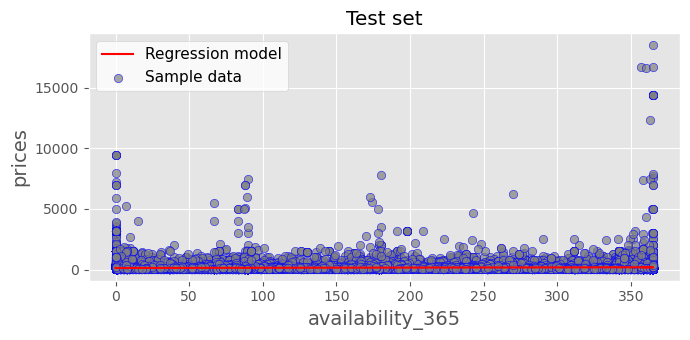

In [2810]:
plt.style.use('default')
plt.style.use('ggplot') #using ggplot

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(X_test, y_test_pred, color='red', label='Regression model')
ax.scatter(X, y, edgecolor='blue', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('prices', fontsize=14)
ax.set_title('Test set')
ax.set_xlabel('availability_365', fontsize=14)
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

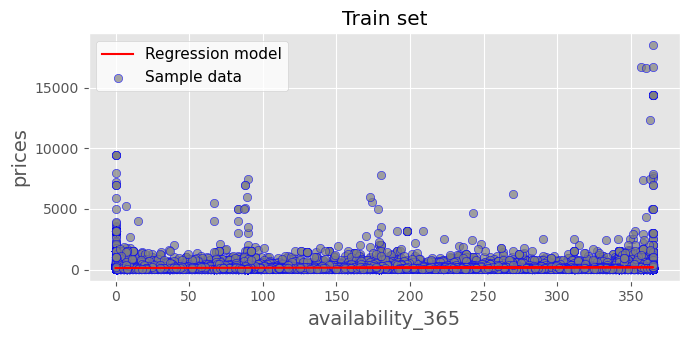

In [2811]:
plt.style.use('default')
plt.style.use('ggplot') #using ggplot

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(X_train, y_train_pred, color='red', label='Regression model')
ax.scatter(X, y, edgecolor='blue', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('prices', fontsize=14)
ax.set_title('Train set')
ax.set_xlabel('availability_365', fontsize=14)
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

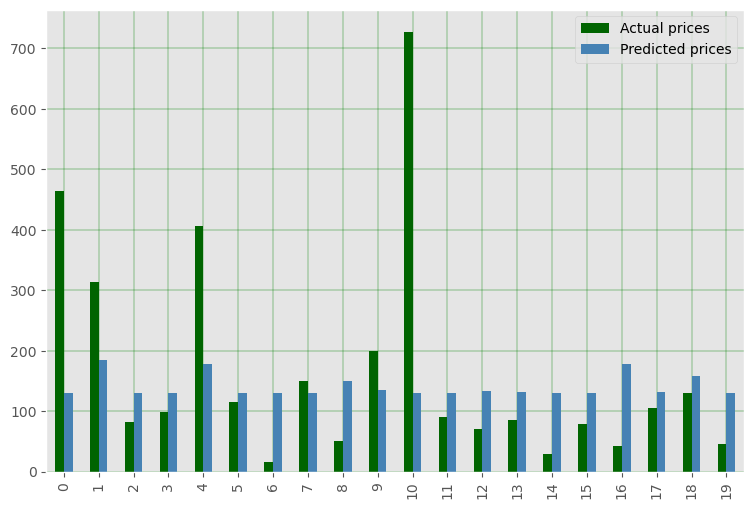

In [2812]:
first20preds=dfLinReg.head(20)
c='darkgreen', 'steelblue'
first20preds.plot(kind='bar',figsize=(9,6), color=c)
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

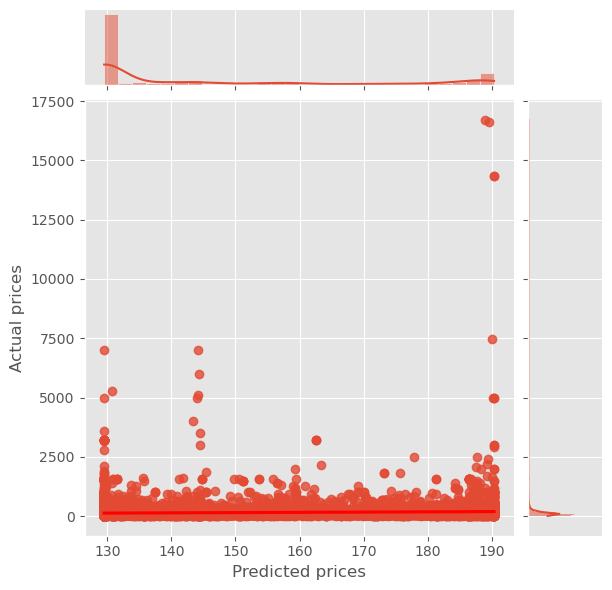

In [2813]:
g= sns.jointplot(x="Predicted prices", y="Actual prices", data=dfLinReg, kind="reg")
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

## Error metrics and R-squared of the Train-Test model(LR): 

In [2814]:
#error metrics and R-squared of the test model(LR)
print("R_squared:", metrics.r2_score(y_test, y_test_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R_squared: 0.00482126513440817
Mean Absolute Error: 112.1711934167125
Mean Squared Error: 112393.39437704264
Root Mean Squared Error: 335.25124067934877


In [2815]:
#error metrics and R-squared of the test model(LR)
print("R_squared:", metrics.r2_score(y_train, y_train_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R_squared: 0.003966247315534965
Mean Absolute Error: 115.20434195830339
Mean Squared Error: 126073.71846808851
Root Mean Squared Error: 355.068610930463


## Plots of actual vs predicted prices comparison:

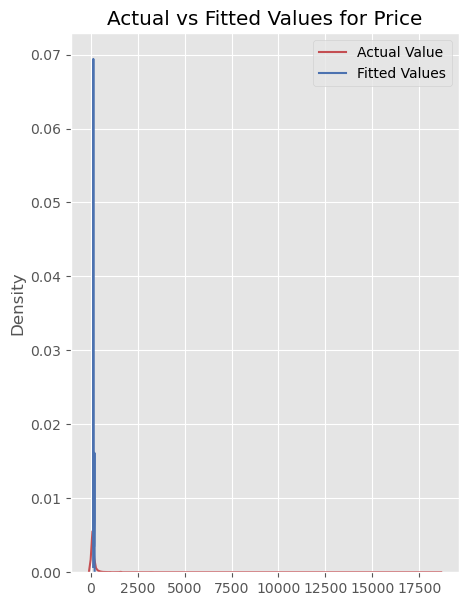

In [2816]:
#comparision plot of actual and predicted prices 
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')

plt.legend()
plt.show()
plt.close()

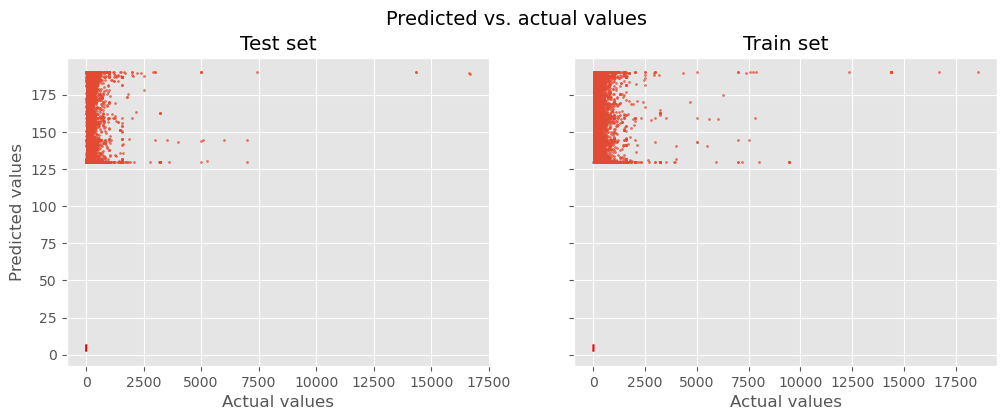

In [2817]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 
fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')
    
ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')
    
plt.show()

## Encoding room type and neighbourhood_cleansed into Room_type_Cat and Neighbour_cleansed Cat (ordinal values): 

In [2818]:
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column

In [2819]:
data2['room_type_Cat'] = labelencoder.fit_transform(data2['room_type'])

In [2820]:
data2['neighbourhood_cleansed_Cat'] = labelencoder.fit_transform(data2['neighbourhood_cleansed'])

In [2821]:
data2

,host_id,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,minimum_nights,availability_30,availability_365,number_of_reviews,reviews_per_month,room_type_Cat,neighbourhood_cleansed_Cat
0,54730,3.0,Islington,51.568610,-0.112700,Private room in rental unit,Private room,65.0,1,26,361,22,0.16,2,18
1,60302,1.0,Kensington and Chelsea,51.487800,-0.168130,Entire rental unit,Entire home/apt,75.0,3,0,4,89,0.61,0,19
2,67564,18.0,Westminster,51.521950,-0.140940,Entire rental unit,Entire home/apt,265.0,4,4,295,43,0.33,0,32
3,67915,3.0,Hammersmith and Fulham,51.479350,-0.197430,Private room in townhouse,Private room,150.0,3,29,364,0,0.00,2,12
4,103583,3.0,Barnet,51.574380,-0.210810,Private room in residential home,Private room,29.0,10,0,0,129,0.91,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66636,96150452,13.0,Croydon,51.419345,-0.079681,Entire condominium (condo),Entire home/apt,120.0,2,0,253,0,0.00,0,7
66637,125392965,9.0,Ealing,51.502002,-0.276895,Entire condominium (condo),Entire home/apt,288.0,3,22,260,0,0.00,0,8
66638,285590054,5.0,Haringey,51.599308,-0.114763,Entire bungalow,Entire home/apt,104.0,5,13,73,0,0.00,0,13
66639,379423186,4.0,Kensington and Chelsea,51.510407,-0.193729,Entire rental unit,Entire home/apt,402.0,7,30,365,0,0.00,0,19


# Multiple Linear Regression

In [2825]:
X_= data2[['host_total_listings_count', 'neighbourhood_cleansed_Cat',
          'room_type_Cat']] # multiple variable regression. 
Y = data2['price']
 
# with sklearn
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  151.9157602811678
Coefficients:  [  0.08413289   1.66216958 -49.72412088]
LinearRegression()


## Train and Test split:

In [2826]:
X_train, X_test, y_train, y_test = train_test_split(X_,Y, test_size=0.3, random_state=1) 

In [2827]:
y_pred2 = regr.predict(X_test)
y_train_pred2 = regr.predict(X_train)

## Here are the actual and predicted prices for Multiple Regression: 

In [2828]:
dfmult= pd.DataFrame({'Actual prices': y_test, 'Predicted prices': y_pred2.flatten()})
dfmult

,Actual prices,Predicted prices
61332,60.0,102.332606
59139,70.0,186.821321
49909,10.0,82.891368
33363,95.0,165.465516
3772,50.0,60.862499
...,...,...
40698,60.0,84.132873
4061,48.0,188.567624
62978,103.0,172.050549
49570,35.0,104.247174


## Here are error metrics and the R-squared of Multiple Regression: 

In [2829]:
#error metrics and r-squared for test model(ML)
print("R_squared:", metrics.r2_score(y_test, y_pred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

R_squared: 0.02652409772794706
Mean Absolute Error: 103.1702273572409
Mean Squared Error: 142554.5268152829
Root Mean Squared Error: 377.5639373871436


In [2830]:
#error metrics and r-squared for train model(ML)
print("R_squared:", metrics.r2_score(y_train, y_train_pred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred2)))

R_squared: 0.035217813821777466
Mean Absolute Error: 101.79436171975856
Mean Squared Error: 108267.13610022719
Root Mean Squared Error: 329.03971811960207


## Boxplot of the errors(ML): 

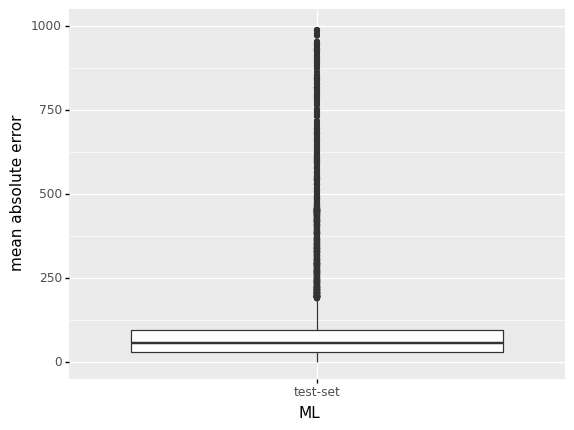

<ggplot: (8770252466077)>

In [2831]:
dfML = pd.DataFrame({'mean absolute error': abs(y_pred2 - y_test), 'ML': 'test-set'})

from plotnine import *

e = (ggplot(dfML, aes(x='ML', y='mean absolute error')) + geom_boxplot() + ylim(0,1000))
           
e

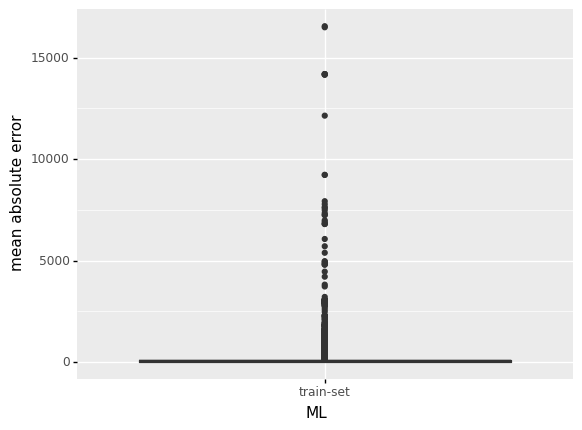

<ggplot: (8770755472047)>

In [2832]:
dfML = pd.DataFrame({'mean absolute error': abs(y_train_pred2 - y_train), 'ML': 'train-set'})

from plotnine import *

f = (ggplot(dfML, aes(x='ML', y='mean absolute error')) + geom_boxplot())
           
f

## Comparison between actual and predicted prices using graphs: 

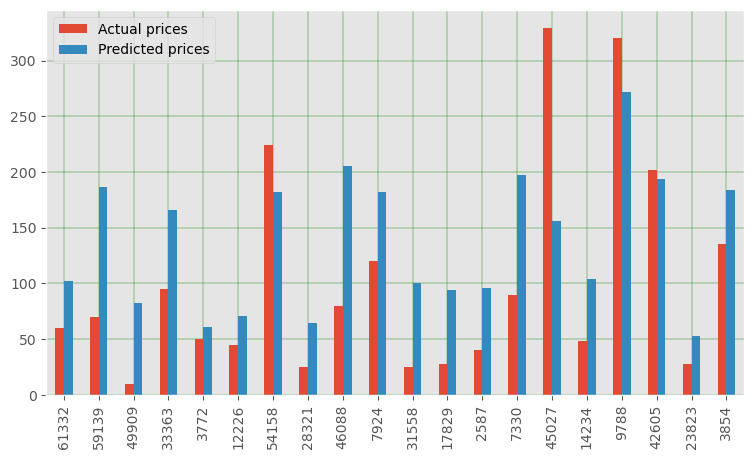

In [2833]:
#comparison 
first20preds2=dfmult.head(20)
first20preds2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

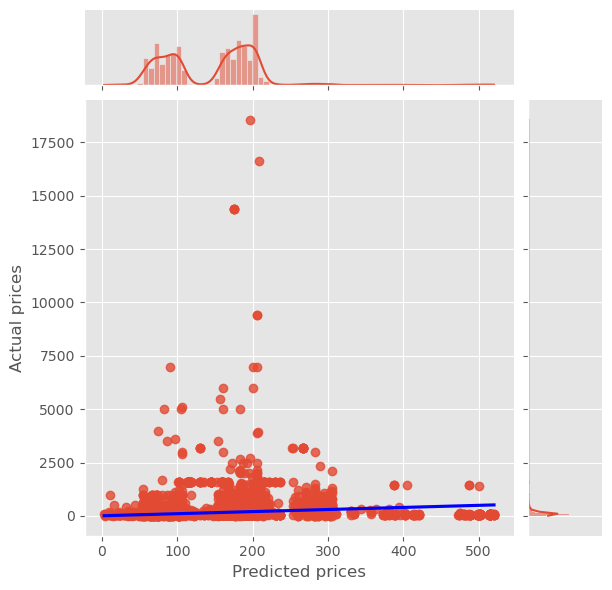

In [2834]:
m= sns.jointplot(x="Predicted prices", y="Actual prices", data=dfmult, kind="reg")
regline = m.ax_joint.get_lines()[0]
regline.set_color('blue')
regline.set_zorder(5)

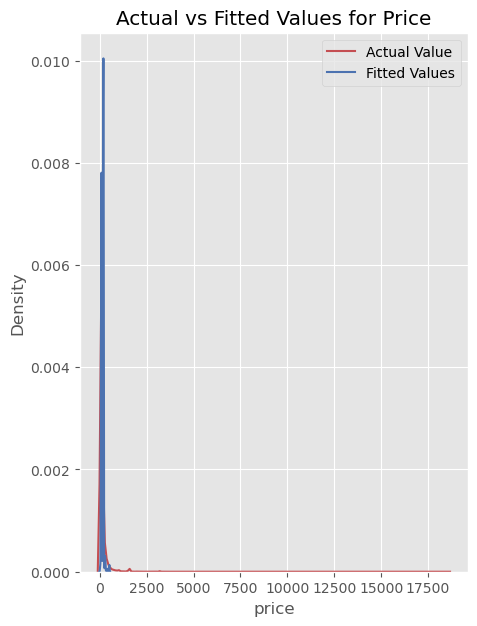

In [2835]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')

plt.legend()
plt.show()
plt.close()

# KNN 
## Grouping prices into economic, low-mid, high-mid, and high to improve the model 

In [2836]:
#creating list of condtions to make the process easier 
conditions = [
    (data2['price'] < 100),
    (data2['price'] >= 100) & (data2['price'] < 250),
     (data2['price'] >= 250) & (data2['price'] < 600),
    (data2['price'] >= 600) ]

# create a list of the values we want to assign for each condition
values = ['economic', 'low-mid', 'high-mid','high']

# create a new column and use np.select to assign values to it using our lists as arguments
data2['price_range'] = np.select(conditions, values)

In [2837]:
data2['price_range'].value_counts()

economic    39126
low-mid     20392
high-mid     5226
high         1874
Name: price_range, dtype: int64

### Encoding the price_range variables to price_rng_Cat:

In [2838]:
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
data2['price_rng_Cat'] = labelencoder.fit_transform(data2['price_range'])

In [2839]:
data3=data2[['host_id','minimum_nights','availability_365', 'neighbourhood_cleansed_Cat',
         'number_of_reviews', 'reviews_per_month', 'host_total_listings_count',
         'room_type_Cat','price', 'price_rng_Cat']]
data3.head()

,host_id,minimum_nights,availability_365,neighbourhood_cleansed_Cat,number_of_reviews,reviews_per_month,host_total_listings_count,room_type_Cat,price,price_rng_Cat
0,54730,1,361,18,22,0.16,3.0,2,65.0,0
1,60302,3,4,19,89,0.61,1.0,0,75.0,0
2,67564,4,295,32,43,0.33,18.0,0,265.0,2
3,67915,3,364,12,0,0.00,3.0,2,150.0,3
4,103583,10,0,1,129,0.91,3.0,2,29.0,0


## Variable Correlation 

### Looking at a correlation plot among the numerical variables

In [2840]:
data3.corr().style.background_gradient(cmap='magma')

,host_id,minimum_nights,availability_365,neighbourhood_cleansed_Cat,number_of_reviews,reviews_per_month,host_total_listings_count,room_type_Cat,price,price_rng_Cat
host_id,1.000000,0.036196,0.189648,-0.008739,-0.136222,0.084455,0.106659,0.023636,0.043599,0.033443
minimum_nights,0.036196,1.000000,0.097287,0.016285,-0.027214,-0.045749,0.265607,-0.027519,0.014866,-0.011770
availability_365,0.189648,0.097287,1.000000,-0.035294,0.082173,0.156474,0.098402,0.035928,0.064980,0.105354
neighbourhood_cleansed_Cat,-0.008739,0.016285,-0.035294,1.000000,0.016959,0.021258,0.012454,-0.048914,0.051747,0.067179
number_of_reviews,-0.136222,-0.027214,0.082173,0.016959,1.000000,0.604116,-0.063984,0.070744,-0.049282,-0.044350
reviews_per_month,0.084455,-0.045749,0.156474,0.021258,0.604116,1.000000,-0.069555,0.013686,-0.038451,0.014551
host_total_listings_count,0.106659,0.265607,0.098402,0.012454,-0.063984,-0.069555,1.000000,-0.048377,0.091441,-0.032930
room_type_Cat,0.023636,-0.027519,0.035928,-0.048914,0.070744,0.013686,-0.048377,1.000000,-0.152267,-0.529210
price,0.043599,0.014866,0.064980,0.051747,-0.049282,-0.038451,0.091441,-0.152267,1.000000,0.148648
price_rng_Cat,0.033443,-0.011770,0.105354,0.067179,-0.044350,0.014551,-0.032930,-0.529210,0.148648,1.000000


### K-nearest neighbors (KNN) with Price_rng_Cat

In [2841]:
#K-nearest neighbors (KNN) with Price_rng_Cat

neigh = KNeighborsClassifier(n_neighbors=3)

X1=data3.iloc[:, :-1].values
Y1=data3['price_rng_Cat'].values

# Split into training and test  
X_train, X_test, y_train, y_test = train_test_split( 
             X1, Y1, test_size = 0.3, random_state=1) 

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#fit the model
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [2842]:
# Predicted class
y_test_pred3=neigh.predict(X_test)
y_train_pred3 = neigh.predict(X_train)

### Creating a dataframe of Actual and Predicted Prices: 

In [2843]:
KNNmod = pd.DataFrame({'Actual prices': y_test.flatten(), 'Predicted prices': y_test_pred3.flatten()})
KNNmod

,Actual prices,Predicted prices
0,0,0
1,0,0
2,0,0
3,0,3
4,0,0
...,...,...
19981,0,0
19982,0,0
19983,3,3
19984,0,0


In [2844]:
# Calculate the accuracy of the model 
print("Accuracy:", neigh.score(X_test, y_test)) 

Accuracy: 0.8732112478735115


In [2845]:
#error metrics and r-squared of test model(KKN with price_rng_Cat): 
print("R_squared:", metrics.r2_score(y_test, y_test_pred3))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3)))

R_squared: 0.49151161350257677
Mean Absolute Error: 0.3344341038727109
Mean Squared Error: 0.9566696687681377
Root Mean Squared Error: 0.9780949180770432


In [2846]:
#error metrics and r-squared of test model(KKN with price_rng_Cat): 
print("R_squared:", metrics.r2_score(y_test, y_test_pred3))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3)))

R_squared: 0.49151161350257677
Mean Absolute Error: 0.3344341038727109
Mean Squared Error: 0.9566696687681377
Root Mean Squared Error: 0.9780949180770432


### Plots of the actual vs predicted prices comparision:

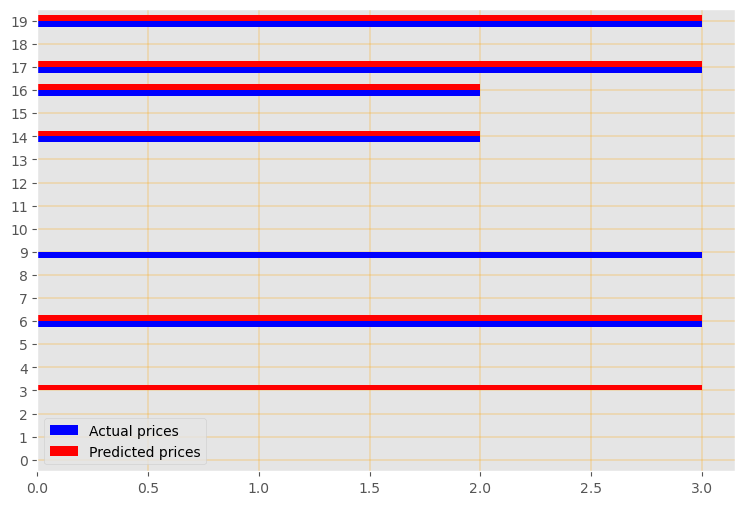

In [2847]:
#comparison 
first20preds3=KNNmod.head(20)
c2='blue', 'red'
first20preds3.plot(kind='barh',figsize=(9,6), color=c2)
plt.grid(which='major', linestyle='-', linewidth='0.3', color='orange')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

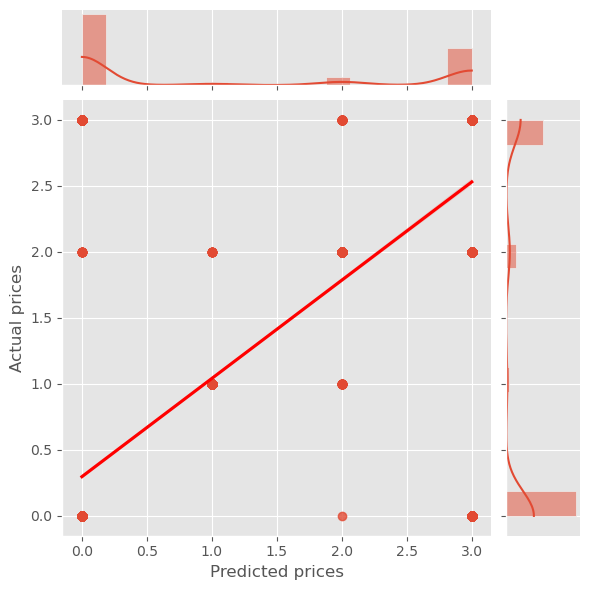

In [2848]:
k = sns.jointplot(x="Predicted prices", y="Actual prices", data=KNNmod, kind="reg")
regline = k.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

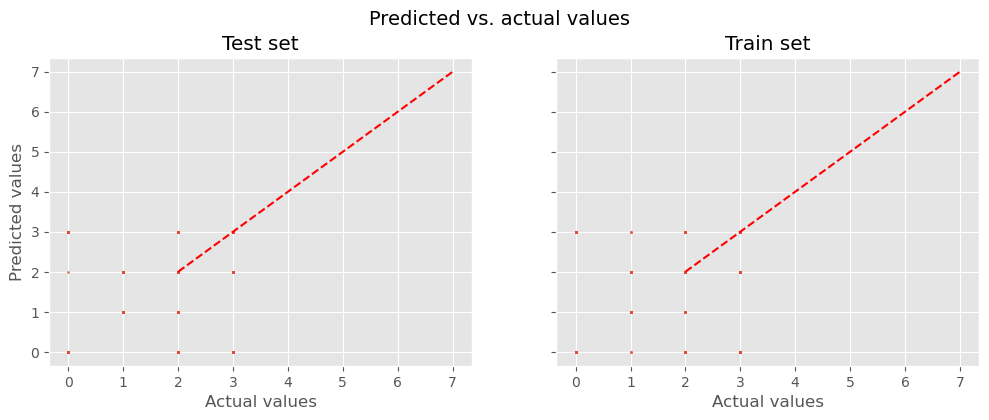

In [2849]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 
fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
ax1.scatter(y_test, y_test_pred3, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')
    
ax2.scatter(y_train, y_train_pred3, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')
    
plt.show()

### Checking The Outliers of the Listings Dataset(plus the HeatMap) and Plotting Graph of hosting_listings_Cat: 

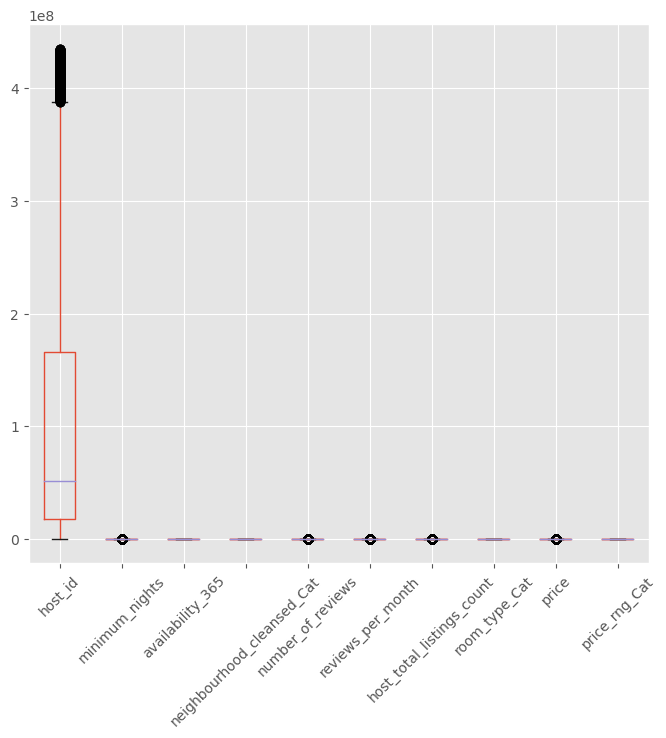

In [2850]:
#find possible outliers of the listing dataset 
#boxplot of columns
boxplot5 = data3.boxplot(figsize=(8,7),rot=45)

<AxesSubplot:xlabel='host_total_listings_count', ylabel='price_rng_Cat'>

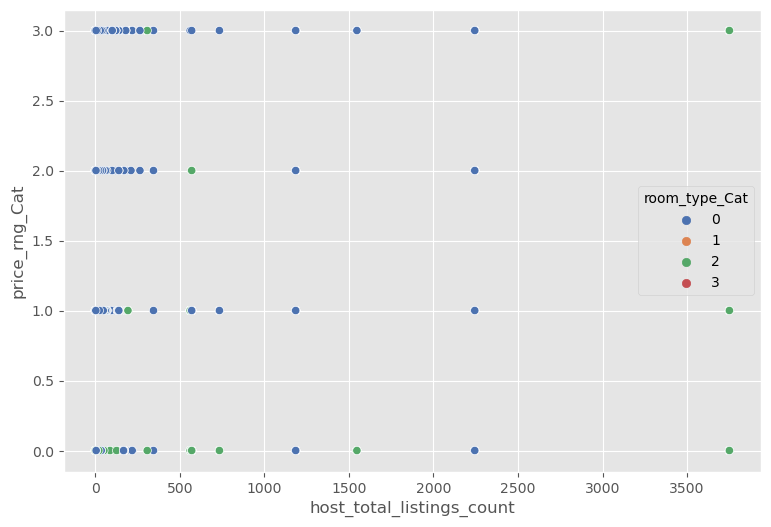

In [2851]:
plt.figure(figsize=(9, 6))  
sns.scatterplot(
    data=data3, x="host_total_listings_count", y="price_rng_Cat", hue="room_type_Cat", 
    sizes=(10, 200), hue_norm=(0, 4), palette= "deep", legend="full")

In [2852]:
data3.corr().style.background_gradient(cmap='mako')

,host_id,minimum_nights,availability_365,neighbourhood_cleansed_Cat,number_of_reviews,reviews_per_month,host_total_listings_count,room_type_Cat,price,price_rng_Cat
host_id,1.000000,0.036196,0.189648,-0.008739,-0.136222,0.084455,0.106659,0.023636,0.043599,0.033443
minimum_nights,0.036196,1.000000,0.097287,0.016285,-0.027214,-0.045749,0.265607,-0.027519,0.014866,-0.011770
availability_365,0.189648,0.097287,1.000000,-0.035294,0.082173,0.156474,0.098402,0.035928,0.064980,0.105354
neighbourhood_cleansed_Cat,-0.008739,0.016285,-0.035294,1.000000,0.016959,0.021258,0.012454,-0.048914,0.051747,0.067179
number_of_reviews,-0.136222,-0.027214,0.082173,0.016959,1.000000,0.604116,-0.063984,0.070744,-0.049282,-0.044350
reviews_per_month,0.084455,-0.045749,0.156474,0.021258,0.604116,1.000000,-0.069555,0.013686,-0.038451,0.014551
host_total_listings_count,0.106659,0.265607,0.098402,0.012454,-0.063984,-0.069555,1.000000,-0.048377,0.091441,-0.032930
room_type_Cat,0.023636,-0.027519,0.035928,-0.048914,0.070744,0.013686,-0.048377,1.000000,-0.152267,-0.529210
price,0.043599,0.014866,0.064980,0.051747,-0.049282,-0.038451,0.091441,-0.152267,1.000000,0.148648
price_rng_Cat,0.033443,-0.011770,0.105354,0.067179,-0.044350,0.014551,-0.032930,-0.529210,0.148648,1.000000


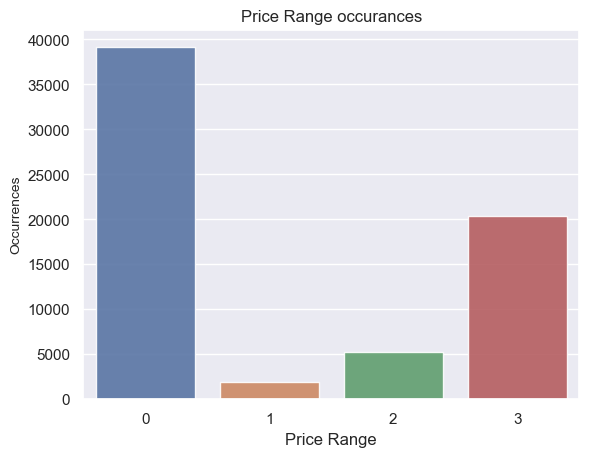

In [2853]:
#occurances of the price ranges(economic(0), low-mid(1), high-mid(2) and high(3)
pRange_count = data3['price_rng_Cat'].value_counts()
sns.set(style="darkgrid")
sns.barplot(pRange_count.index, pRange_count.values, alpha=0.9)
plt.title('Price Range occurances')
plt.ylabel('Occurrences', fontsize=10)
plt.xlabel('Price Range', fontsize=12)
plt.show()

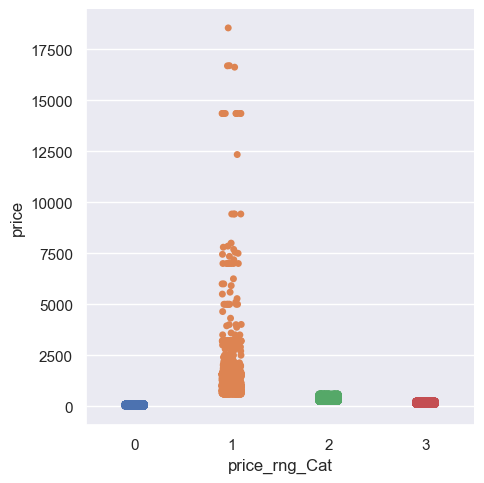

In [2854]:
#shows the comparison with price and price_rng_Cat
sns.catplot(x='price_rng_Cat', y='price', data=data3)

## KNN Regression with host_total_listings_count and room_type_Cat as explanatory variables and price_rng_Cat as outcome variable 

In [2855]:
#KNN Regression with host_total_listings_count and room_type_Cat
knn = KNeighborsRegressor(algorithm='auto')
cols = data3[['host_total_listings_count', 'neighbourhood_cleansed_Cat', 'room_type_Cat']].values

X2=cols
Y2=data3['price_rng_Cat'].values

In [2856]:
#normalize the X2 values
X_normalized = preprocessing.normalize(X2, norm='max')
X_normalized

array([[0.16666667, 1.        , 0.11111111],
       [0.05263158, 1.        , 0.        ],
       [0.5625    , 1.        , 0.        ],
       ...,
       [0.38461538, 1.        , 0.        ],
       [0.21052632, 1.        , 0.        ],
       [0.18518519, 1.        , 0.        ]])

### Importing Train-Test Split and fitting in the model: 

In [2857]:
# Split into training and test  
X_train, X_test, y_train, y_test = train_test_split( 
             X_normalized, Y2, test_size = 0.3) 

#fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

### Predicting Train and Test features: 

In [2858]:
# Predicted class
y_test_pred4=knn.predict(X_test)
y_train_pred4=knn.predict(X_train)

### Here is the actual and predicted prices: 

In [2859]:
KNNreg = pd.DataFrame({'Actual prices_rng_Cat': y_test.flatten(), 'Predicted prices_rng_Cat': y_test_pred4.flatten()})
KNNreg

,Actual prices_rng_Cat,Predicted prices_rng_Cat
0,3,0.0
1,0,3.0
2,2,2.0
3,3,1.2
4,3,3.0
...,...,...
19981,3,1.8
19982,1,1.0
19983,3,1.4
19984,0,1.6


### Calculating the error metrics and R_squared of KNN with Price as outcome variable:

In [2860]:
KNNreg['squared_error'] = (KNNreg['Predicted prices_rng_Cat'] - KNNreg['Actual prices_rng_Cat'])**(2)
mse = KNNreg['squared_error'].mean()
rmse2 = mse ** (1/2)
rmse2

#Error metrics and r-squared for test model(KKN with price_rng_Cat):
from sklearn.metrics import mean_absolute_error #calculate MAE
print("R_squared:", metrics.r2_score(y_test, y_test_pred4))
print("MAE:", mean_absolute_error(y_test, y_test_pred4))
print("MSE:", mse)
print("RMSE:", rmse2)

R_squared: 0.22594192447712447
MAE: 0.8777744421094766
MSE: 1.4597057940558826
RMSE: 1.208182847939782


In [2861]:
#Error metrics and r-squared for train model(KKN with price_rng_Cat):
from sklearn.metrics import mean_absolute_error #calculate MAE
print("R_squared:", metrics.r2_score(y_train, y_train_pred4))
print("MAE:", mean_absolute_error(y_train, y_train_pred4))
print("MSE:", mse)
print("RMSE:", rmse2)

R_squared: 0.24731929219012938
MAE: 0.8569694630296792
MSE: 1.4597057940558826
RMSE: 1.208182847939782


### Plotting Boxplot of Error(KKN1):

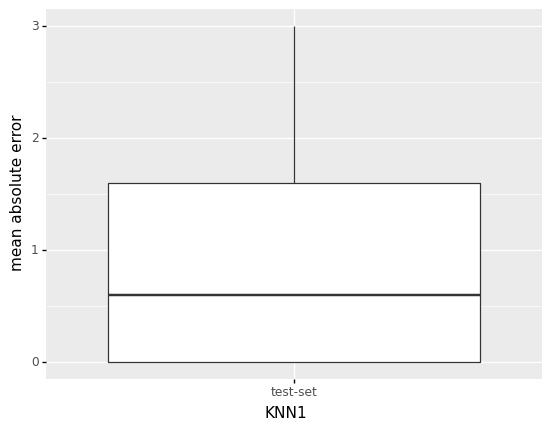

<ggplot: (8770180987474)>

In [2862]:
dfKNN1 = pd.DataFrame({'mean absolute error': abs(y_test_pred4 - y_test), 'KNN1': 'test-set'})

from plotnine import *

z = (ggplot(dfKNN1, aes(x='KNN1', y='mean absolute error')) + geom_boxplot())
           
z

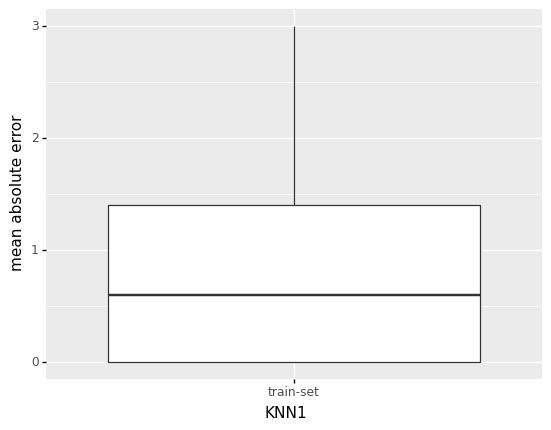

<ggplot: (8770754644878)>

In [2863]:
dfKNN1 = pd.DataFrame({'mean absolute error': abs(y_train_pred4 - y_train), 'KNN1': 'train-set'})

from plotnine import *

y = (ggplot(dfKNN1, aes(x='KNN1', y='mean absolute error')) + geom_boxplot())
           
y

### Graphs to show the comparson of actual and predicted prices:

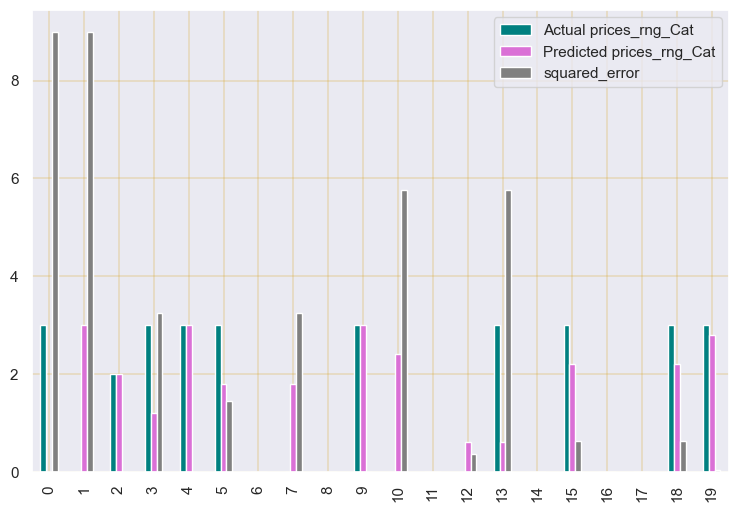

In [2864]:
#comparison 
first20preds4=KNNreg.head(20)
c2='teal', 'orchid','gray'
first20preds4.plot(kind='bar',figsize=(9,6), color=c2)
plt.grid(which='major', linestyle='-', linewidth='0.3', color='goldenrod')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

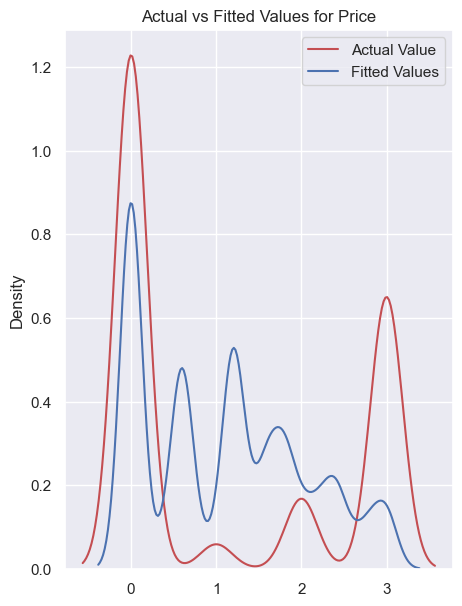

In [2865]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred4, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')

plt.legend()
plt.show()
plt.close()

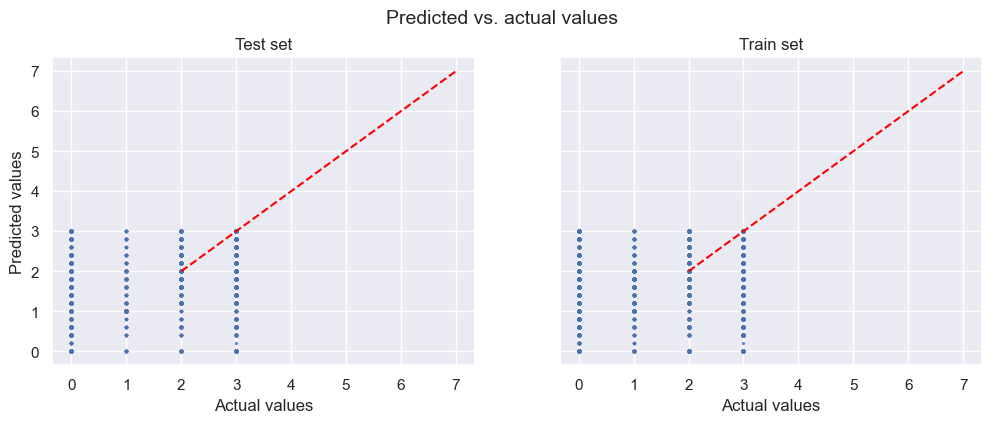

In [2866]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 
fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
ax1.scatter(y_test, y_test_pred4, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')
    
ax2.scatter(y_train, y_train_pred4, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')
    
plt.show()

Change the format: The above KNN regresion is not optimal to predict price or price range.. Changing parameters did not improve performance.

## KNN with Price Comparison 

In [2867]:
#K-nearest neighbors (KNN) with Price


neigh = KNeighborsClassifier(n_neighbors=3)

X3=data3[['room_type_Cat', 'neighbourhood_cleansed_Cat', 'host_total_listings_count']].values
Y3=data3['price'].values

# Split into training and test  
X_train, X_test, y_train, y_test = train_test_split( 
             X3, Y3, test_size = 0.3, random_state=42) 

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#fit the model
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicting Test and Train Features:

In [2868]:
# Predicted class
y_test_pred5=neigh.predict(X_test)
y_train_pred5 = neigh.predict(X_train)

### Here are the actual and predicted values:

In [2869]:
KNNmod2 = pd.DataFrame({'Actual prices': y_test.flatten(), 'Predicted prices': y_test_pred5.flatten()})
KNNmod2

,Actual prices,Predicted prices
0,80.0,53.0
1,60.0,21.0
2,330.0,200.0
3,49.0,38.0
4,60.0,62.0
...,...,...
19981,40.0,37.0
19982,185.0,10.0
19983,38.0,23.0
19984,75.0,140.0


In [2870]:
# Calculate the accuracy of the model 
print("Accuracy:", neigh.score(X_test, y_test)) 

Accuracy: 0.040328229760832585


In [2871]:
#the error metrics of test model(KNN with price as outcome variable):
print("R_squared:", metrics.r2_score(y_test, y_test_pred5))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred5))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred5)))

R_squared: 0.23863717829273456
Mean Absolute Error: 77.12163514460121
Mean Squared Error: 110732.59276493546
Root Mean Squared Error: 332.7650714316866


In [2872]:
#the errors metrics of train model(KNN with price as outcome variable):
print("R_squared:", metrics.r2_score(y_train, y_train_pred5))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred5))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred5)))

R_squared: 0.3162926804817474
Mean Absolute Error: 73.89751672671127
Mean Squared Error: 77018.19546663236
Root Mean Squared Error: 277.5215225286723


### Plots of actual and predicted prices:

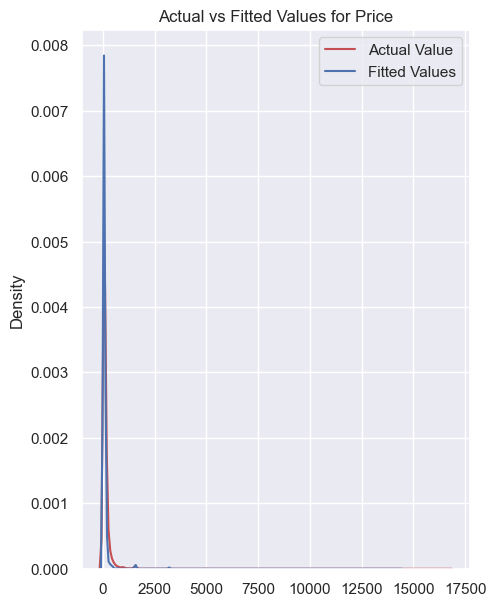

In [2873]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred5, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')

plt.legend()
plt.show()
plt.close()

### Boxplots of the errors(KNN):

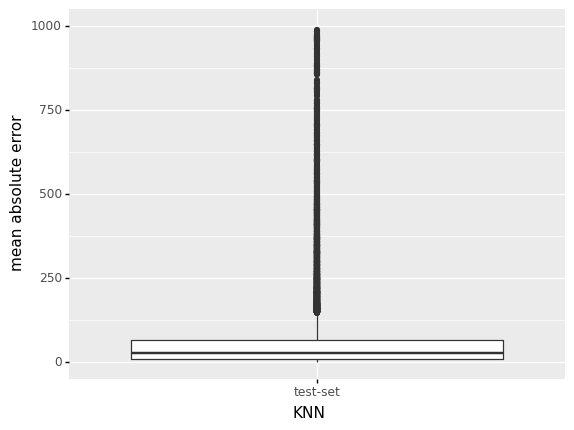

<ggplot: (8770197908703)>

In [2874]:
dfKNN = pd.DataFrame({'mean absolute error': abs(y_test_pred5 - y_test), 'KNN': 'test-set'})

from plotnine import *

h = (ggplot(dfKNN, aes(x='KNN', y='mean absolute error')) + geom_boxplot() + ylim(0,1000))
           
h

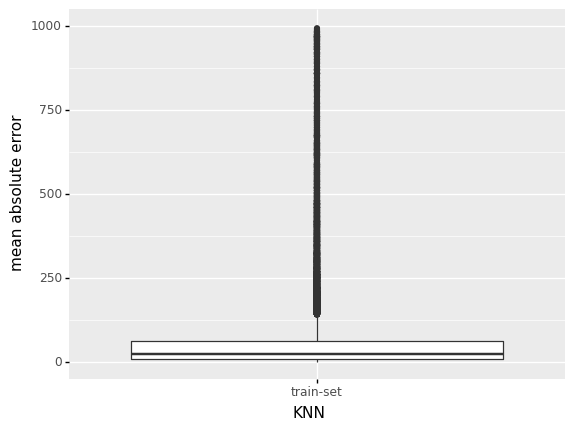

<ggplot: (8770150225767)>

In [2875]:
dfKNN = pd.DataFrame({'mean absolute error': abs(y_train_pred5 - y_train), 'KNN': 'train-set'})

from plotnine import *

i = (ggplot(dfKNN, aes(x='KNN', y='mean absolute error')) + geom_boxplot() + ylim(0,1000))
           
i 

# DECISION TREE

## Decision Tree(price_rng_Cat as the outcome variable)

In [2876]:
Treedf=data3[[ 'minimum_nights', 'availability_365', 'number_of_reviews',
       'reviews_per_month', 'neighbourhood_cleansed_Cat', 'host_total_listings_count', 'room_type_Cat', 'price', 'price_rng_Cat']]

In [2877]:
##Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

#split dataset in features and target variable
feature_cols = ['room_type_Cat', 'neighbourhood_cleansed_Cat', 'host_total_listings_count']
X = Treedf[feature_cols].values # Features
y = Treedf.price_rng_Cat.values # Target variable

### Scaling the train and test features: 

In [2878]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2879]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred6 = clf.predict(X_test)

### Error metrics, Accuracy  and R-squared of test sets 

In [2880]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred6), 2), '%')

Accuracy: 0.6 %


In [2881]:
#error metrics and r-squared of Decision model(with price_rng_Cat):
print("R_squared:", metrics.r2_score(y_test, y_pred6))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred6))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

R_squared: -0.5705391143817786
Mean Absolute Error: 1.060542379665766
Mean Squared Error: 2.9725808065645953
Root Mean Squared Error: 1.724117399298724


### Actual vs Predicted Prices Dataframe and Plots

In [2882]:
Treecls = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred6.flatten()})
Treecls

,Actual,Predicted
0,0,0
1,0,3
2,2,0
3,0,0
4,0,0
...,...,...
19981,0,0
19982,3,0
19983,0,0
19984,0,0


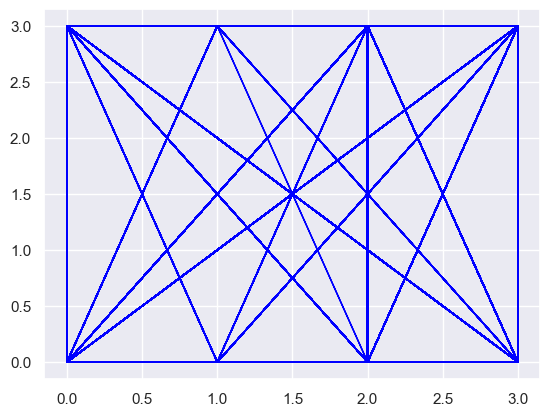

In [2883]:
a=Treecls.Actual 
b=Treecls.Predicted
plt.plot(a, b, color='blue', linewidth=1)
plt.show()

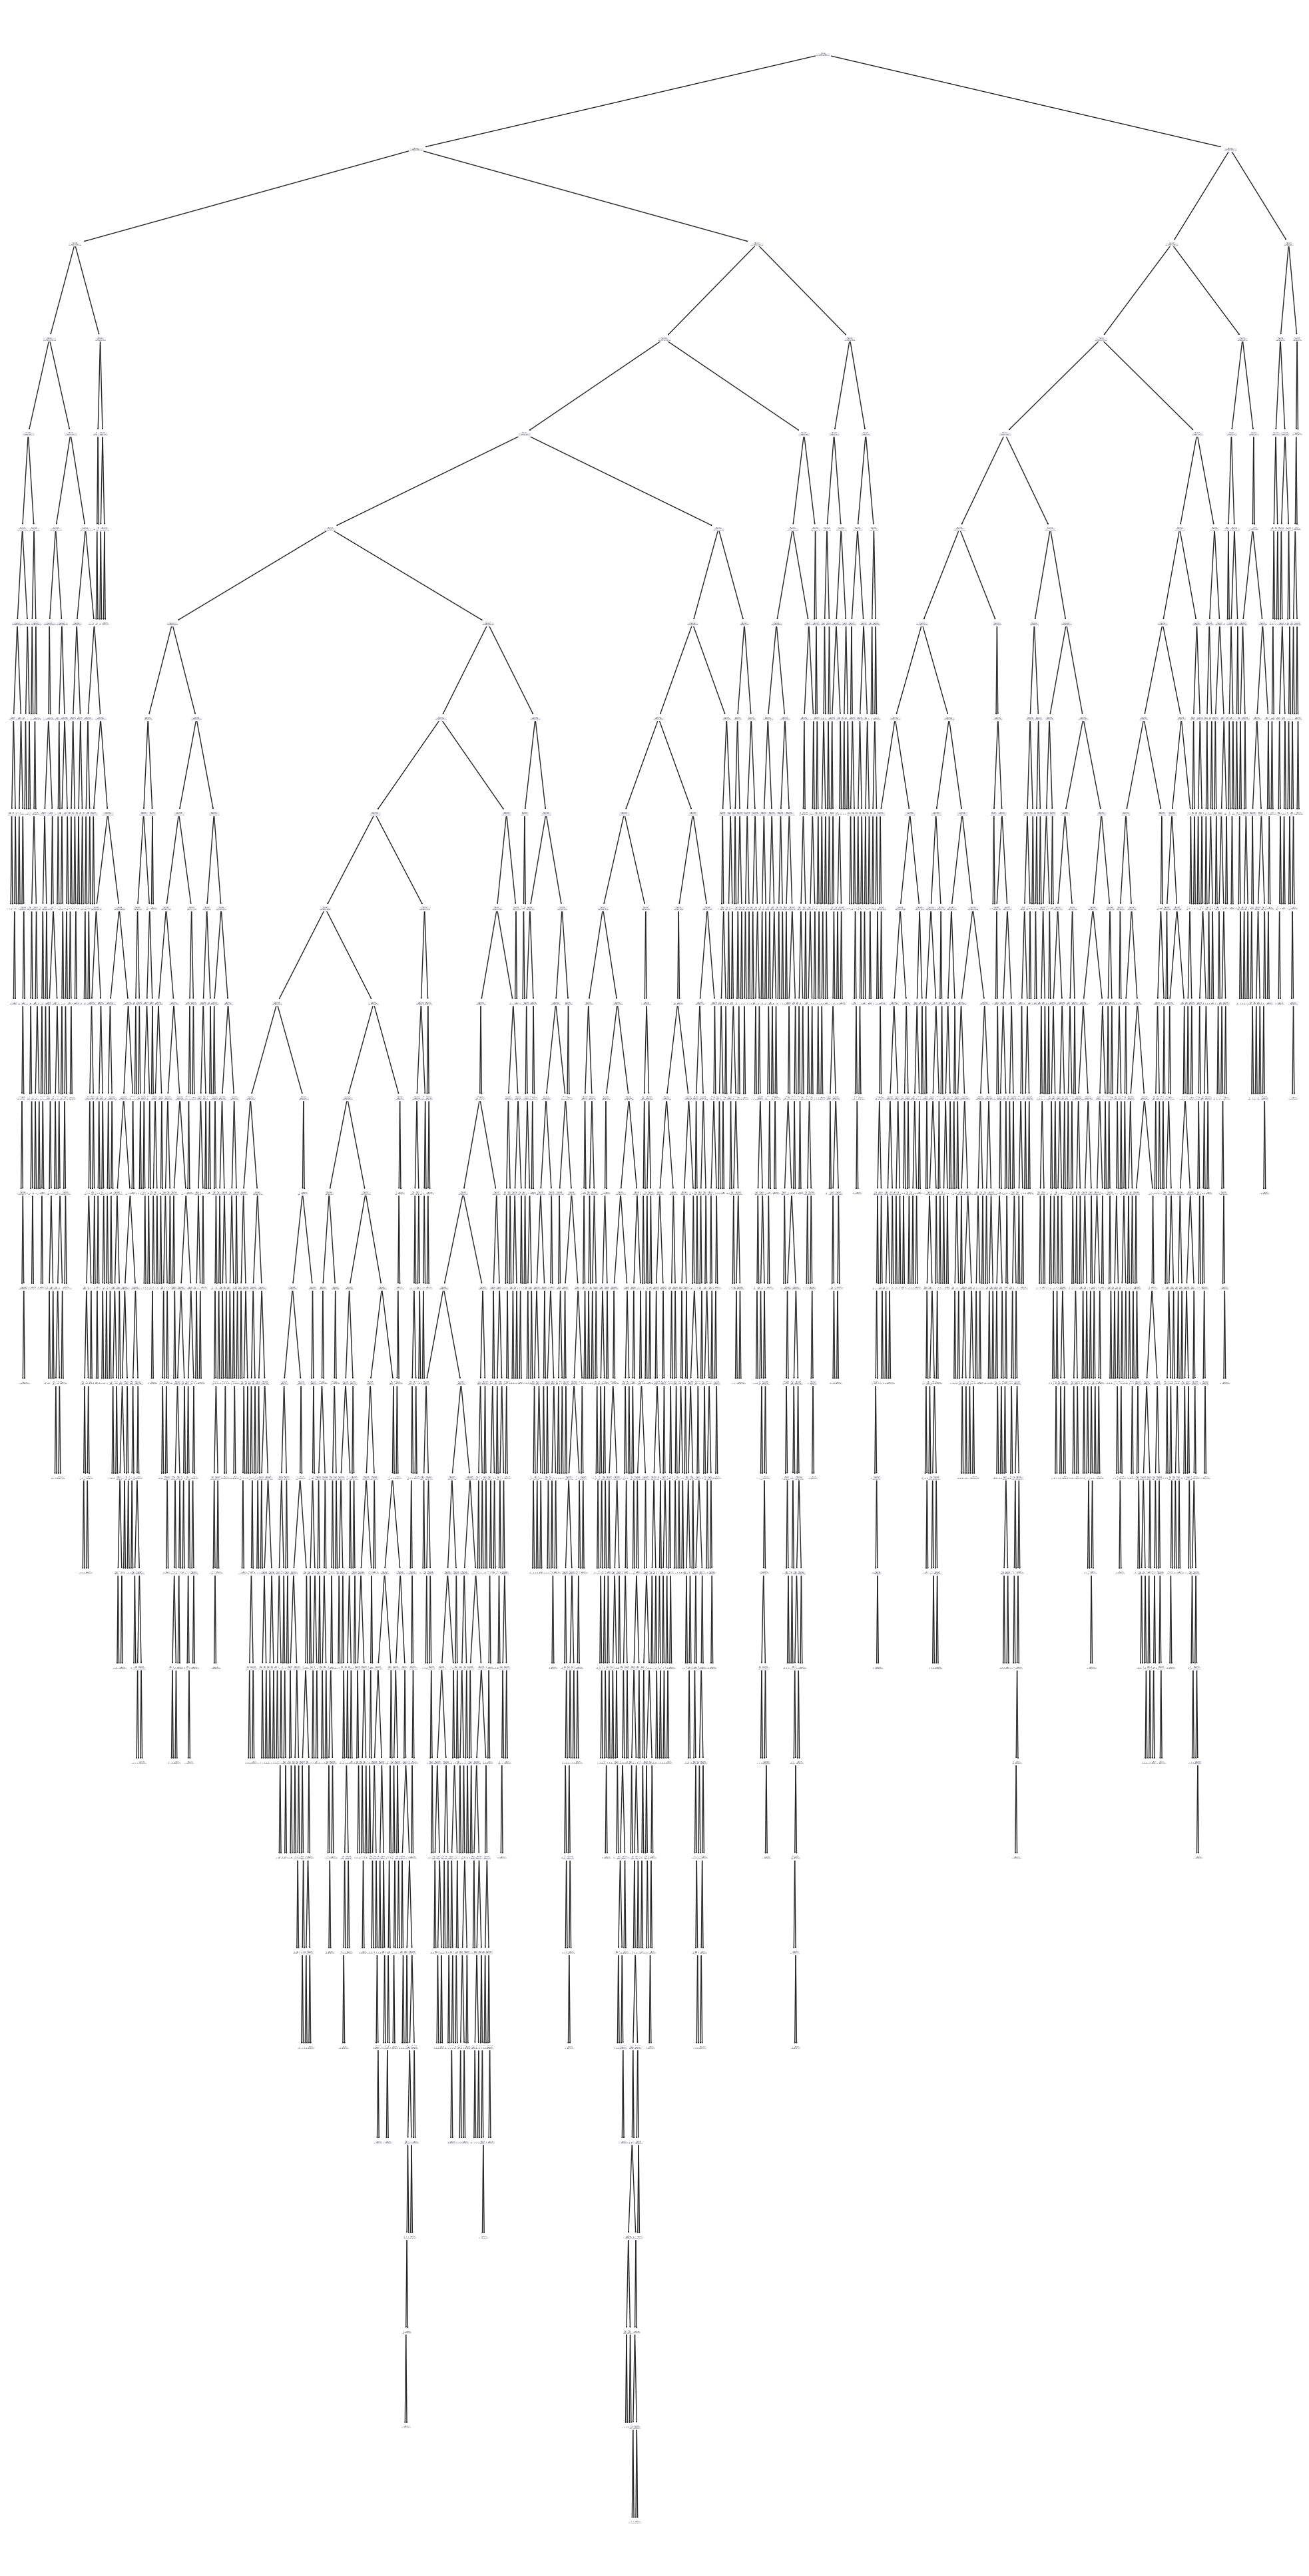

In [2884]:
#plot tree
fig = plt.figure(figsize=(25,50))
_ = tree.plot_tree(clf)

In [2885]:
##Results

KNNmod

,Actual prices,Predicted prices
0,0,0
1,0,0
2,0,0
3,0,3
4,0,0
...,...,...
19981,0,0
19982,0,0
19983,3,3
19984,0,0


## Decision Tree(price as the outcome variable)

In [2886]:
##Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

#split dataset in features and target variable
feature_cols = ['room_type_Cat', 'neighbourhood_cleansed_Cat', 'host_total_listings_count']
X = Treedf[feature_cols].values # Features
y = Treedf.price.values # Target variable

### Scaling the train and test features: 

In [2887]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2888]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_test_pred8 = clf.predict(X_test)
y_train_pred8 = clf.predict(X_train)

### Error metrics and R-squared of train-test sets 

In [2889]:
#error metrics and r-squared of train set (Decision modelwith price):
print("R_squared:", metrics.r2_score(y_test, y_test_pred8))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred8))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred8))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred8)))

R_squared: -0.0749164163786964
Mean Absolute Error: 108.59551686180326
Mean Squared Error: 156335.82097468228
Root Mean Squared Error: 395.39324851934725


In [2890]:
#error metrics and r-squared of train model(Decision model with price):
print("R_squared:", metrics.r2_score(y_train, y_train_pred8))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred8))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred8))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred8)))

R_squared: -0.09577492081407546
Mean Absolute Error: 108.70265054040144
Mean Squared Error: 123436.74644021272
Root Mean Squared Error: 351.3356606440808


### Boxplots of the errors(DT): 

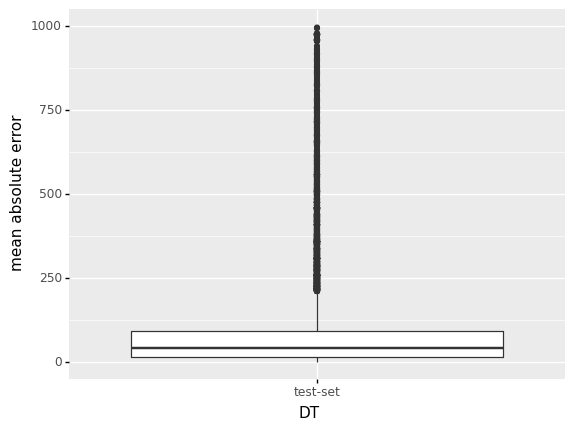

<ggplot: (8770500083538)>

In [2891]:
dfDT = pd.DataFrame({'mean absolute error': abs(y_test_pred8 - y_test), 'DT': 'test-set'})

from plotnine import *

j = (ggplot(dfDT, aes(x='DT', y='mean absolute error')) + geom_boxplot() + ylim(0,1000))
           
j

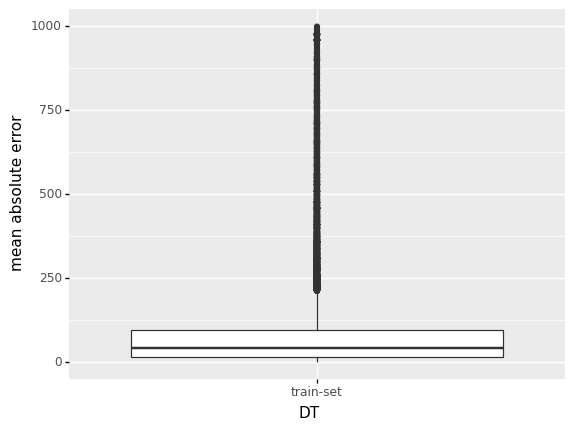

<ggplot: (8770150422056)>

In [2892]:
dfDT = pd.DataFrame({'mean absolute error': abs(y_train_pred8 - y_train), 'DT': 'train-set'})

from plotnine import *

k = (ggplot(dfDT, aes(x='DT', y='mean absolute error')) + geom_boxplot() + ylim(0,1000))
           
k

# Random Forest Regression 

In [2893]:
X = data3[['host_total_listings_count', 'neighbourhood_cleansed_Cat',
          'room_type_Cat']]  
y = data3['price']

### Importing Train-Test split: 

In [2894]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [2895]:
print('Train group shape:', X_train.shape)
print('Test group shape:', X_test.shape)

Train group shape: (46632, 3)
Test group shape: (19986, 3)


### Importing the RandomForest Regressor: 

In [2896]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

### Predicting the Train and Test Features: 

In [2897]:
y_test_pred7 = regressor.predict(X_test)
y_train_pred7 = regressor.predict(X_train)

### Creating a dataframe of Actual and Predicted Prices: 

In [2898]:
Rfr=pd.DataFrame({'Actual Prices':y_test, 'Predicted Prices':y_test_pred7})
Rfr

,Actual Prices,Predicted Prices
49733,464.0,518.786410
42379,314.0,132.271296
45011,82.0,136.195188
27418,98.0,129.610843
57519,406.0,145.270128
...,...,...
54488,70.0,131.810046
34396,40.0,55.480806
47591,36.0,82.225196
49458,70.0,103.915458


### Error metrics and R-squared of Train-Test Model(Random Forest): 

In [2899]:
#error metrics and r-squared of test model(Random Forest)
from sklearn import metrics #using the test model
print("R_squared:", metrics.r2_score(y_test, y_test_pred7))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred7))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred7))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred7)))

R_squared: 0.4017169318443238
Mean Absolute Error: 70.89539173874677
Mean Squared Error: 67568.83208262062
Root Mean Squared Error: 259.9400547869078


In [2900]:
#error metrics and r-squared of trained model(Random Forest)
print("R_squared:", metrics.r2_score(y_train, y_train_pred7))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred7))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred7))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred7)))

R_squared: 0.5001008617814279
Mean Absolute Error: 70.01957813407046
Mean Squared Error: 63275.10794122038
Root Mean Squared Error: 251.545439118304


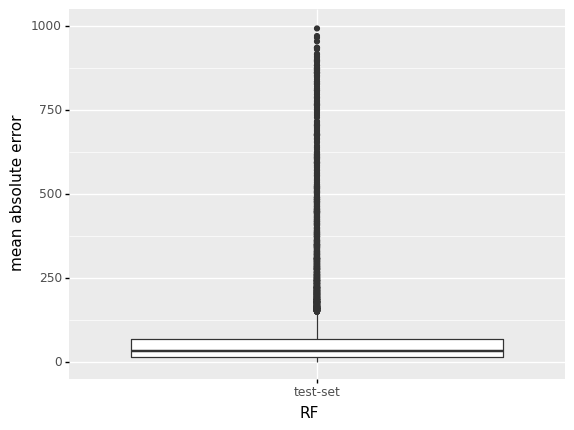

<ggplot: (8770136252218)>

In [2901]:
dfRF = pd.DataFrame({'mean absolute error': abs(y_test_pred7 - y_test), 'RF': 'test-set'})

from plotnine import *

l = (ggplot(dfRF, aes(x='RF', y='mean absolute error')) + geom_boxplot() + ylim(0,1000))
           
l #outliers,, 50% cases that could be right, but other 50% may be very wrong 
#think of ways to made the data to make it wrong
#what do they represent and when to zoom in and zoom out 

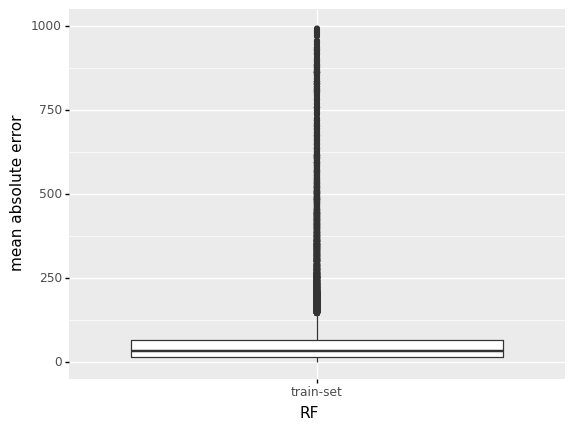

<ggplot: (8770804650081)>

In [2902]:
dfRF2 = pd.DataFrame({'mean absolute error': abs(y_train_pred7 - y_train), 'RF': 'train-set'})

from plotnine import *

m = (ggplot(dfRF2, aes(x='RF', y='mean absolute error')) + geom_boxplot() + ylim(0,1000))
          
m 

### Plotting Graphs of Actual and Predicted Prices comparison: 

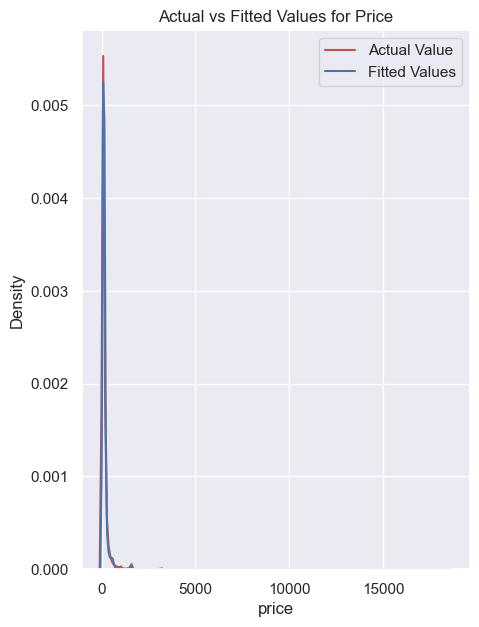

In [2903]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred7, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')

plt.legend()
plt.show()
plt.close()

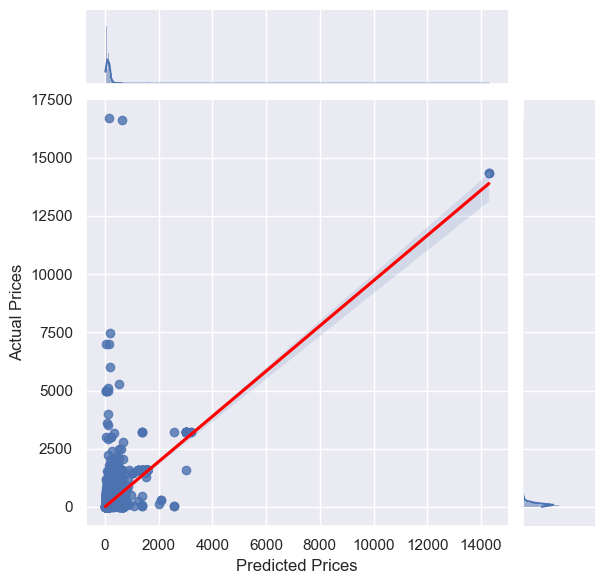

In [2904]:
r = sns.jointplot(x="Predicted Prices", y="Actual Prices", data=Rfr, kind="reg")
regline = r.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

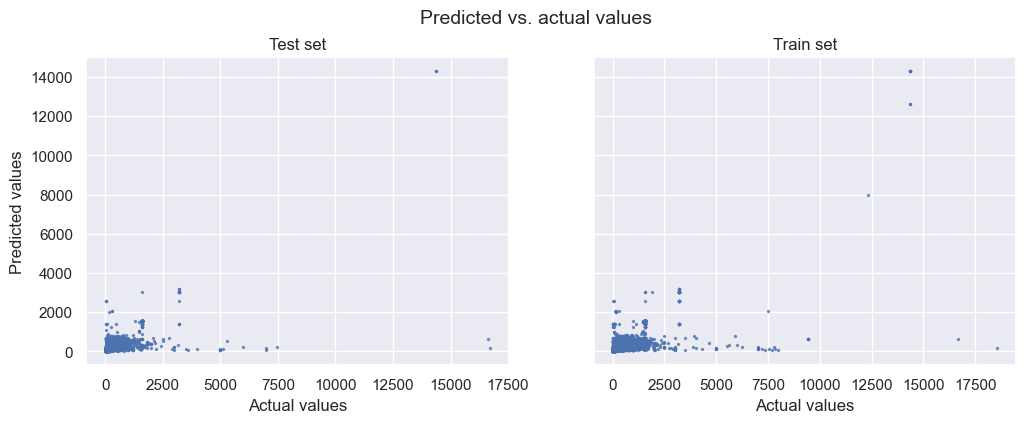

In [2905]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 
fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
ax1.scatter(y_test, y_test_pred7, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')
    
ax2.scatter(y_train, y_train_pred7, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='red', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')
    
plt.show()

# Boxplots of the Errors of all Machine Learning Regression Models 

In [2906]:
import patchworklib as pw

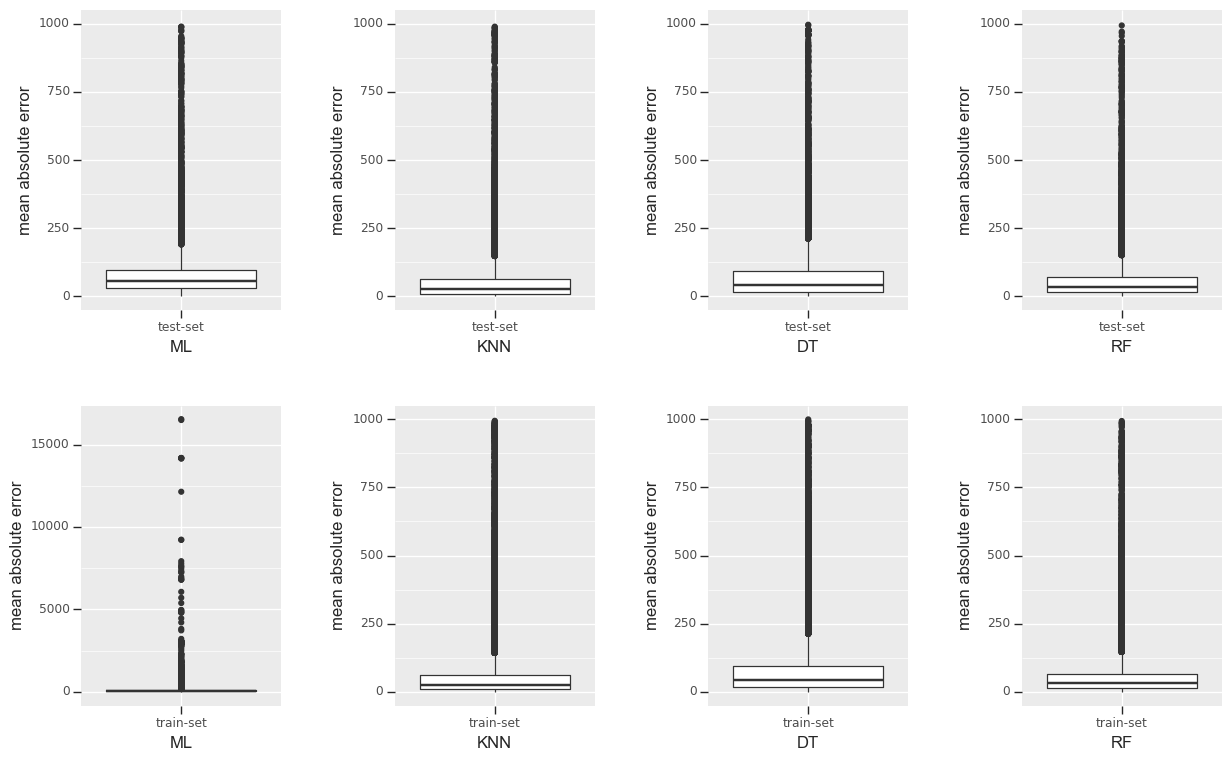

In [2907]:
e = pw.load_ggplot(e, figsize=(2,3))
h = pw.load_ggplot(h, figsize=(2,3))
j = pw.load_ggplot(j, figsize=(2,3))
l = pw.load_ggplot(l, figsize=(2,3))
f  = pw.load_ggplot(f, figsize=(2,3))
i = pw.load_ggplot(i, figsize=(2,3))
k = pw.load_ggplot(k, figsize=(2,3))
m = pw.load_ggplot(m, figsize=(2,3))

g1234 = (e|h|j|l)/(f|i|k|m)
g1234.savefig()